## Distance Matrix

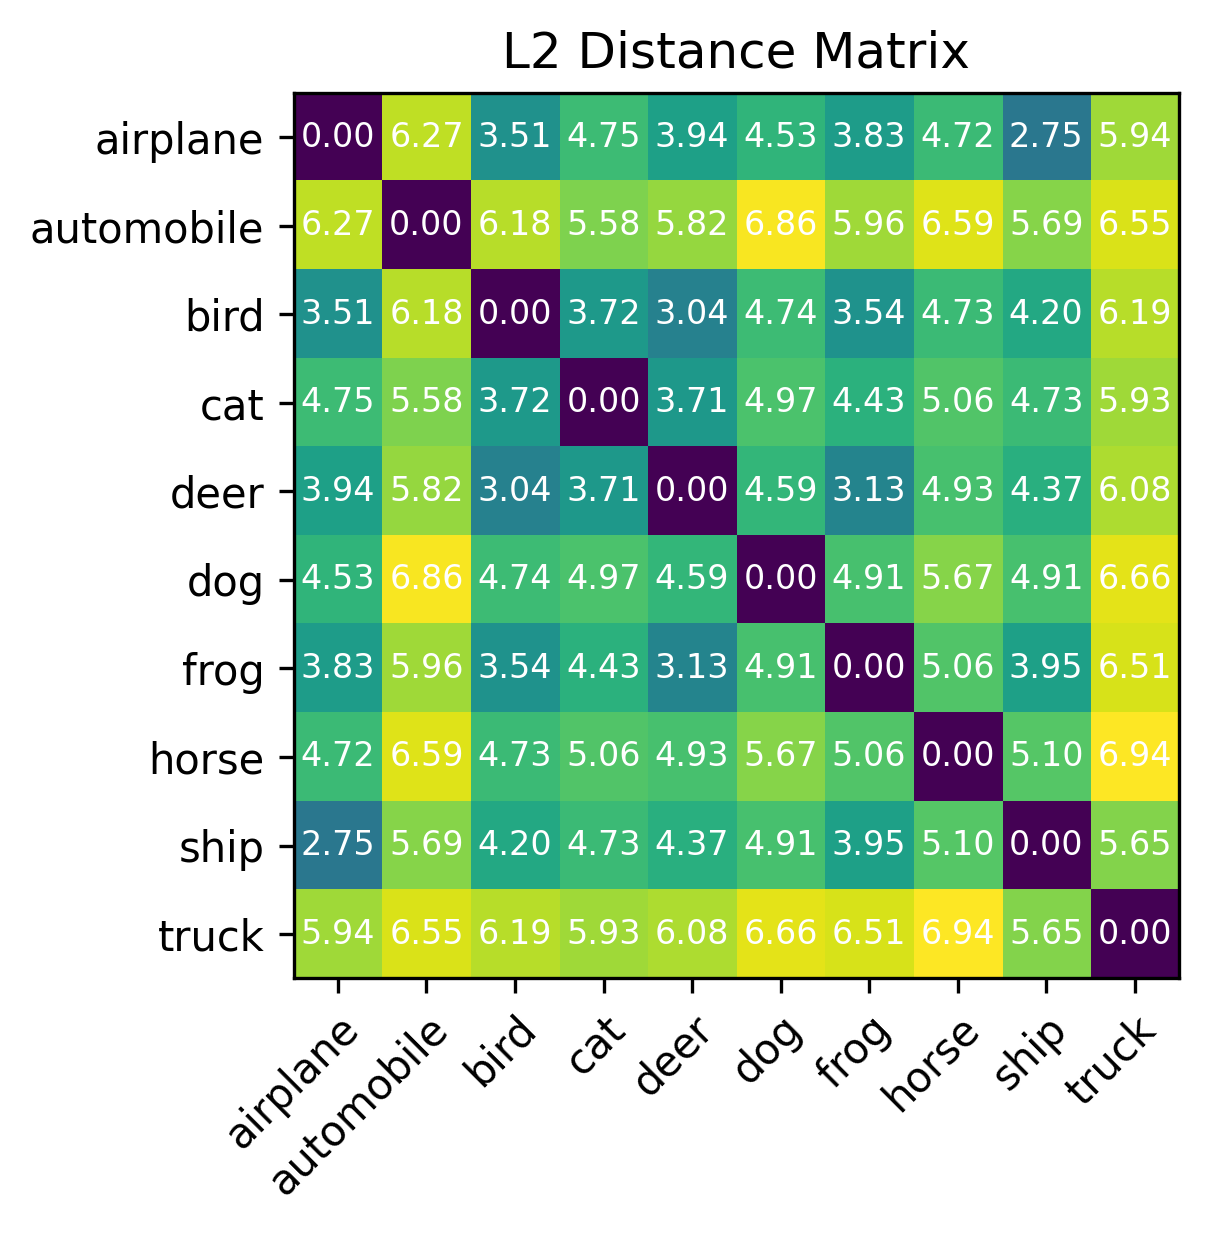

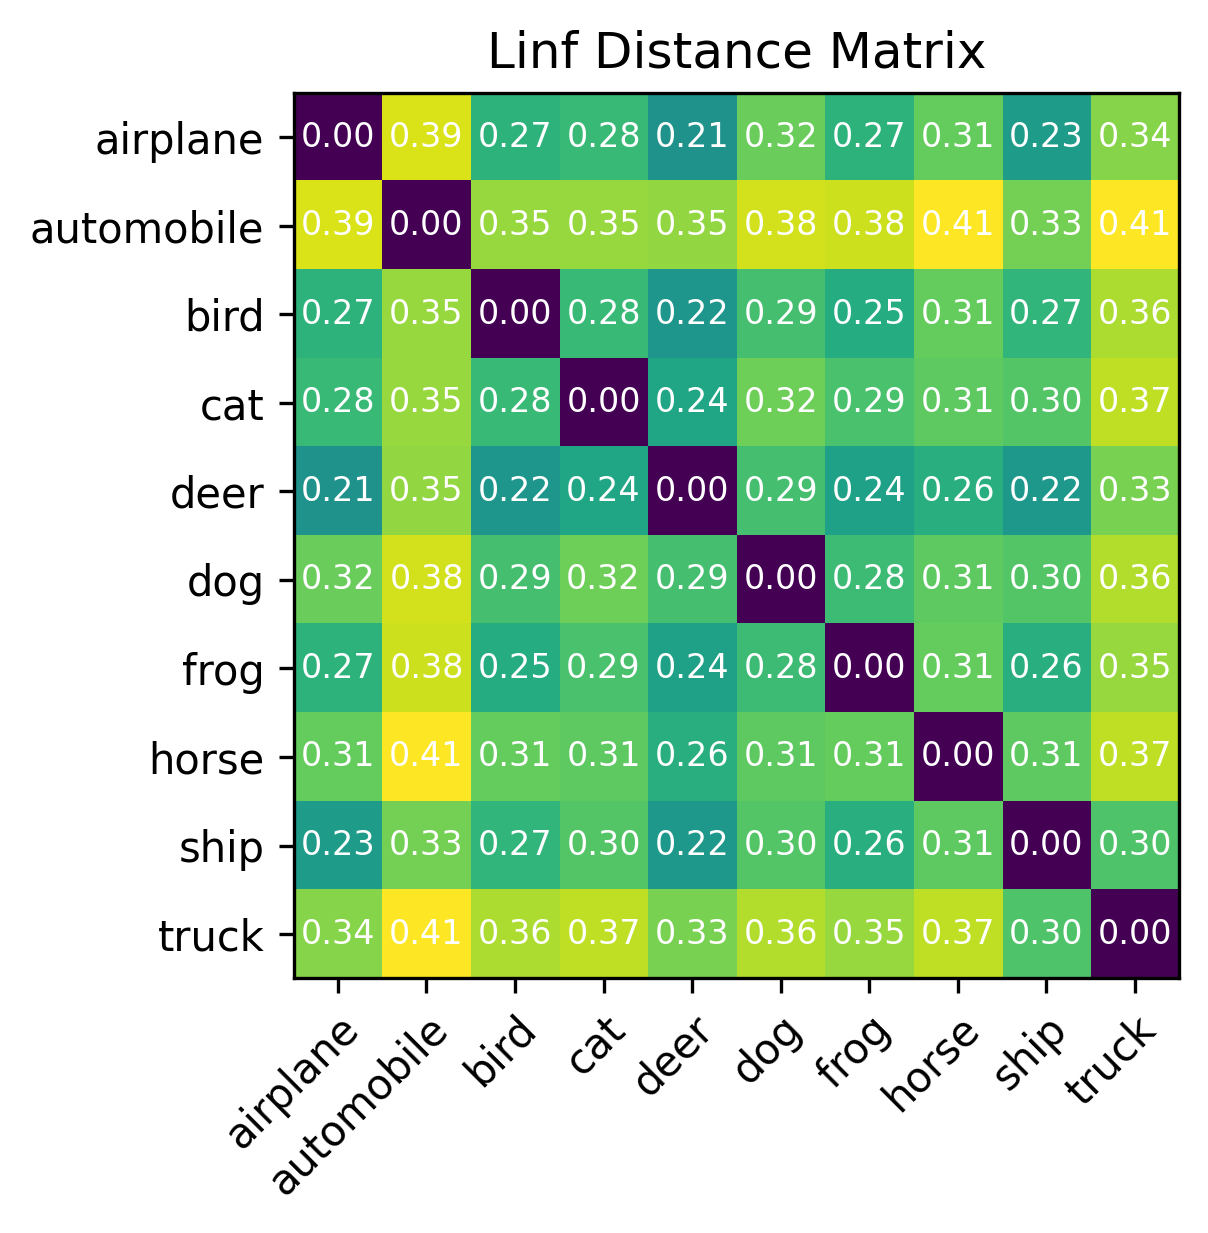

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def work(distss, title):
    labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    fig, ax = plt.subplots(dpi=300)
    im = ax.imshow(distss)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i, dists in enumerate(distss):
        for j, dist in enumerate(dists):
            text = ax.text(j, i, '{0:.2f}'.format(dist), ha="center", va="center", color="white", fontsize=8)

    fig.tight_layout(), ax.set_title(title), plt.show()


from output.dist import L2
work(np.array(L2), "L2 Distance Matrix")

from output.dist import Linf
work(np.array(Linf), "Linf Distance Matrix")


## MNIST

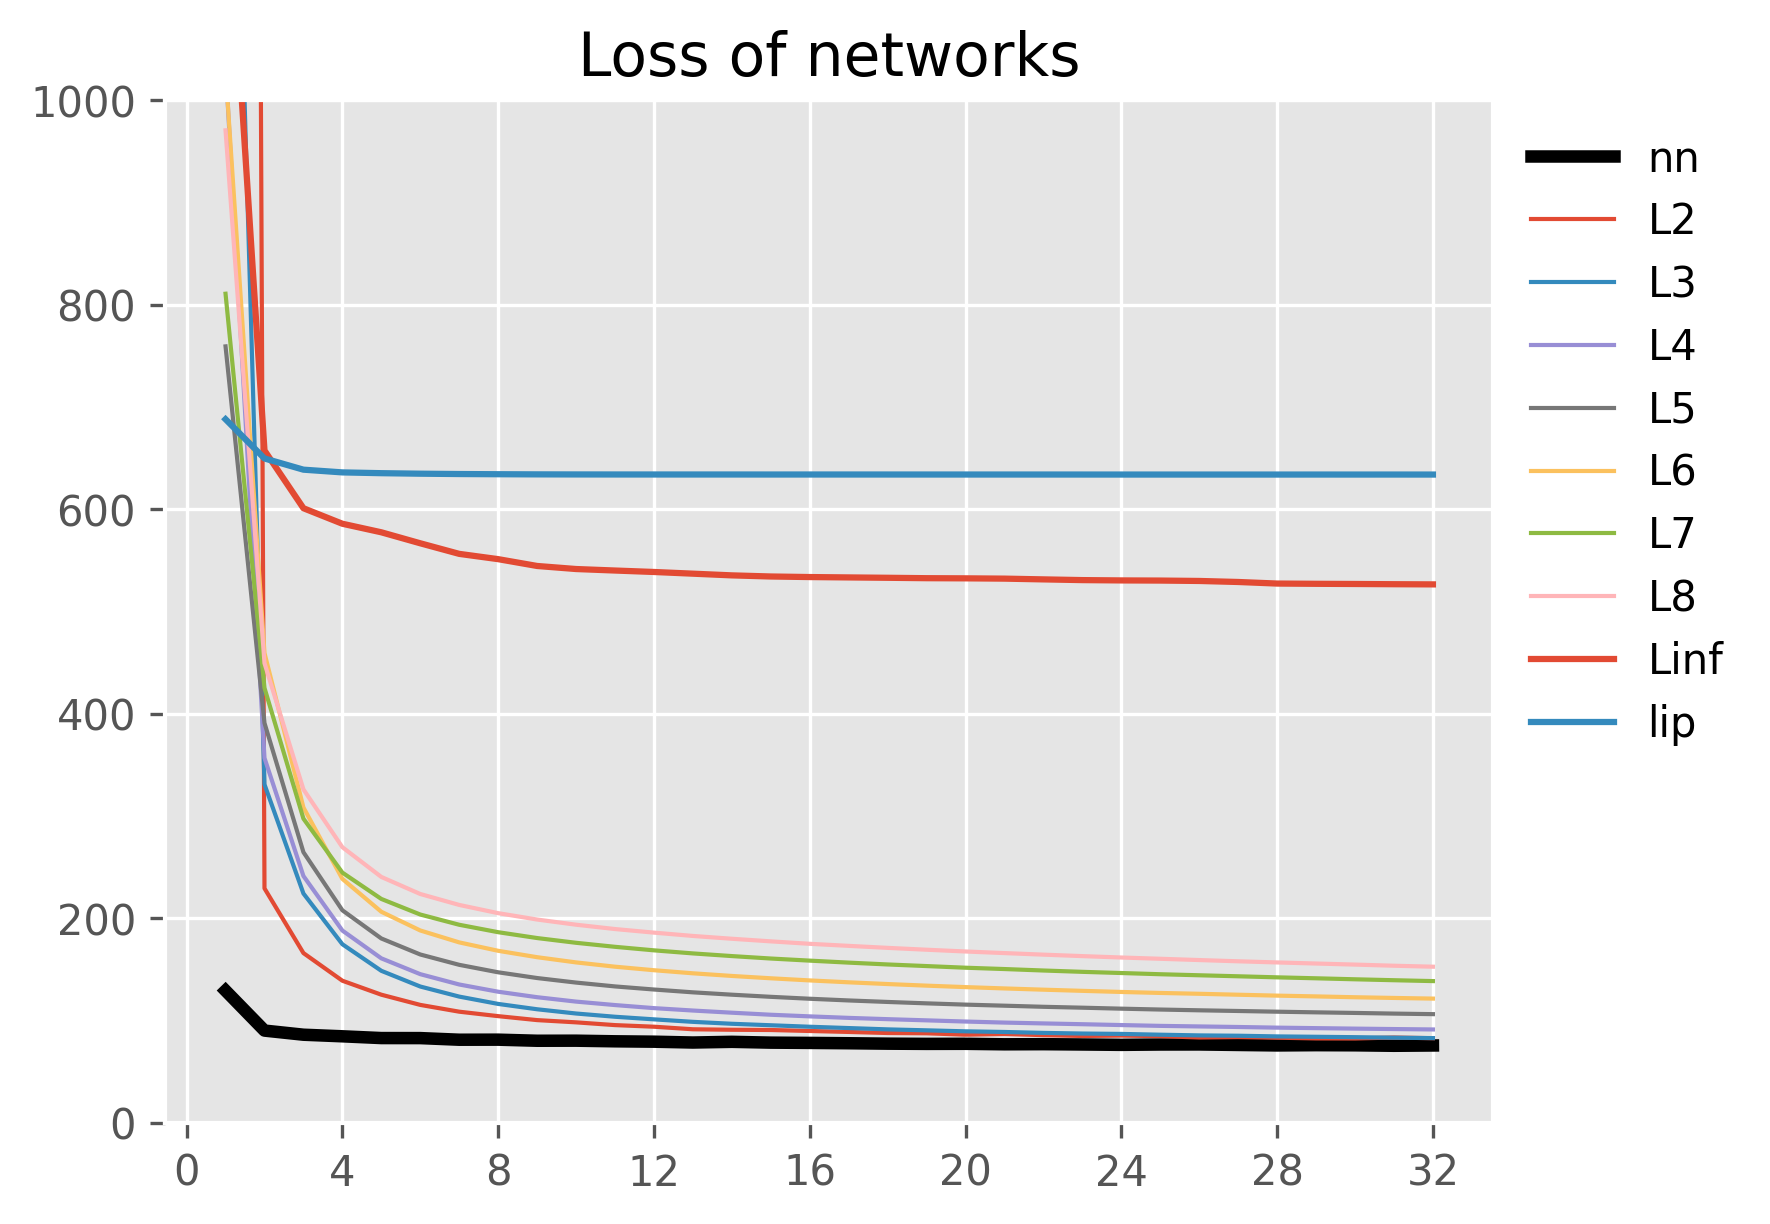

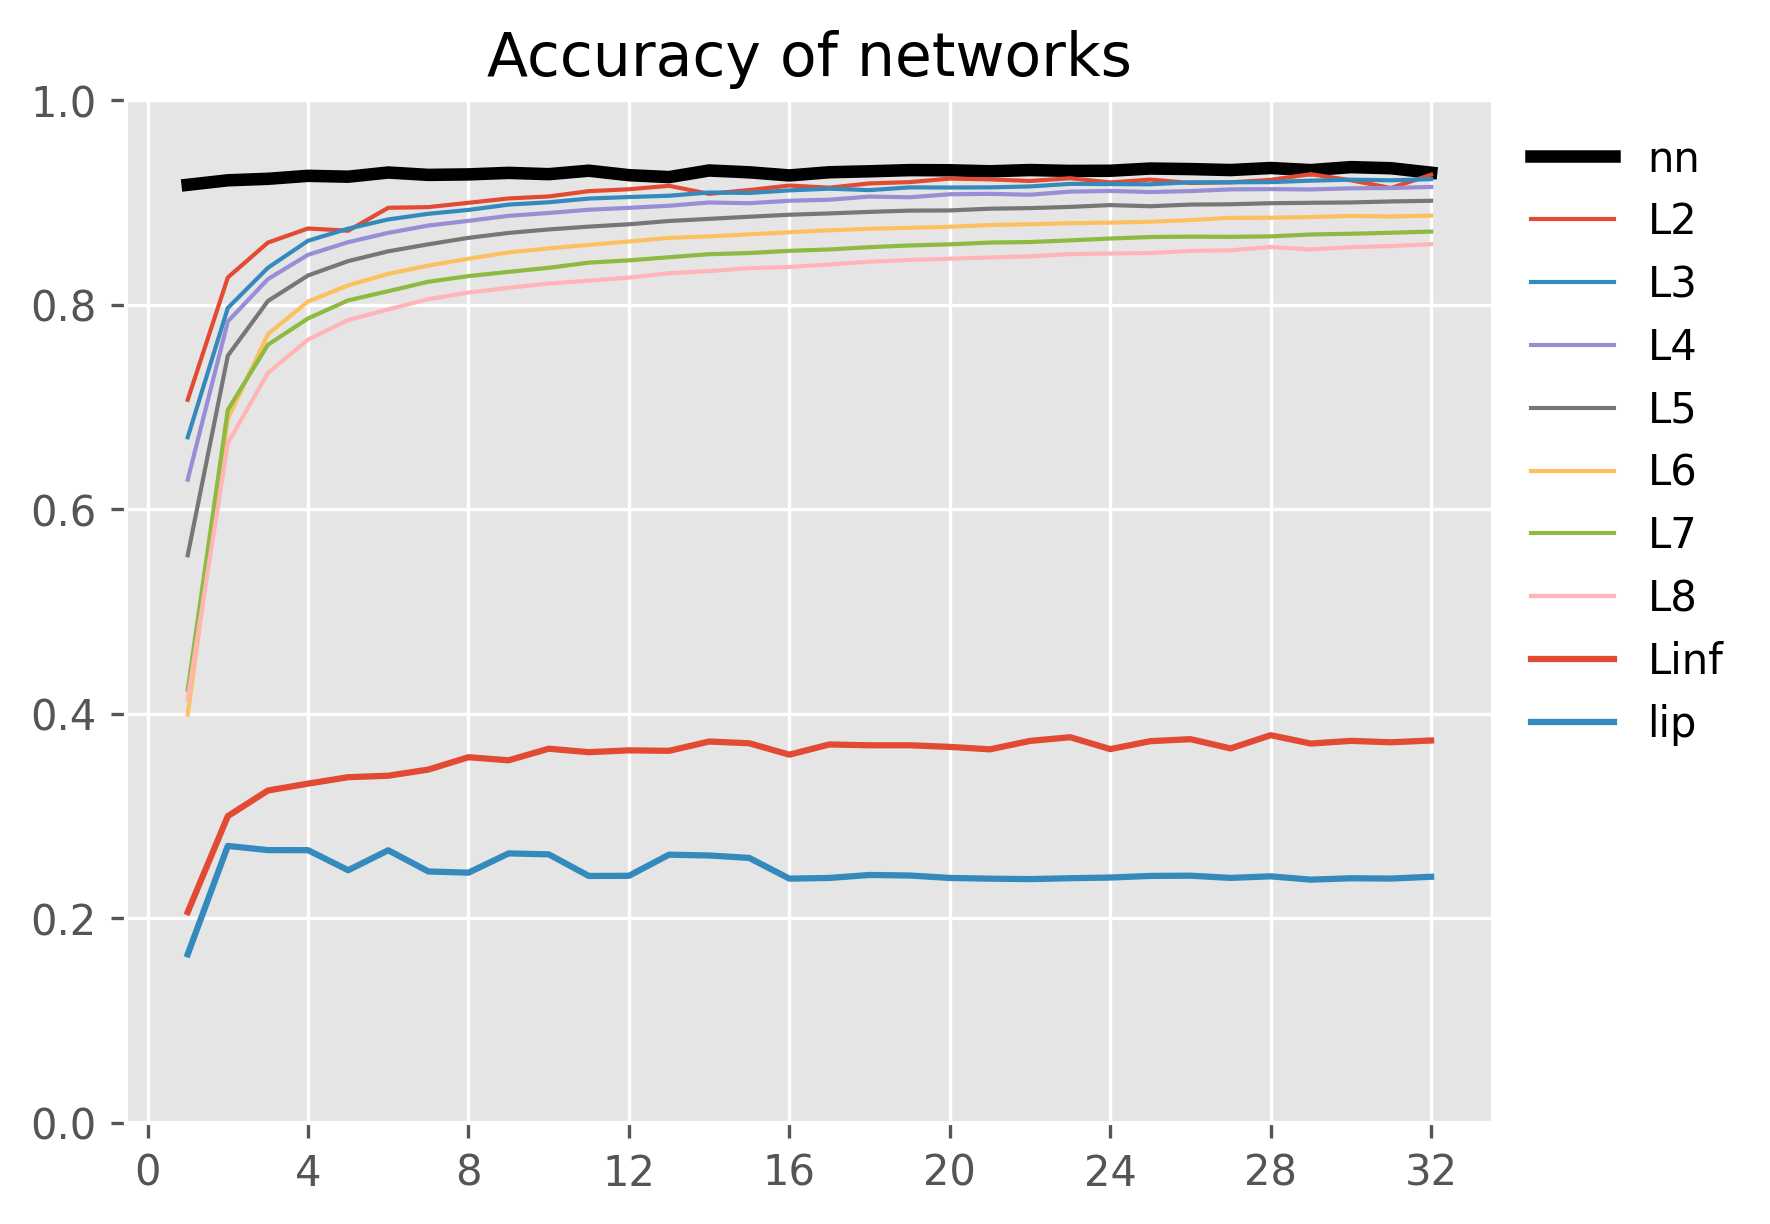

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
def plot(ax, data_dict, n=32):
    for label, data in data_dict.items():
        if label == "nn":
            ax.plot(range(1, n+1), data[:n], label=label, linewidth=3, c="black")
        elif label in ["L2", "L3", "L4", "L5", "L6", "L7", "L8"]:
            ax.plot(range(1, n+1), data[:n], label=label, linewidth=1)

        if label == "lip" or label == "Linf":
            ax.plot(range(1, n+1), data[:n], label=label)
    ax.set_xticks(range(0, n+1, 4))

# ----------------------------------- LOSS ----------------------------------- #
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

from output.mnist import loss
plot(ax, loss)

ax.set_ylim((0, 1000))
ax.legend(bbox_to_anchor=(1, 1), framealpha=0)
fig.tight_layout(), ax.set_title("Loss of networks"), plt.show();

# --------------------------------- ACCURACY --------------------------------- #
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

from output.mnist import accuracy
plot(ax, accuracy)

ax.set_ylim((0, 1))
ax.legend(bbox_to_anchor=(1, 1), framealpha=0)
fig.tight_layout(), ax.set_title("Accuracy of networks"), plt.show();


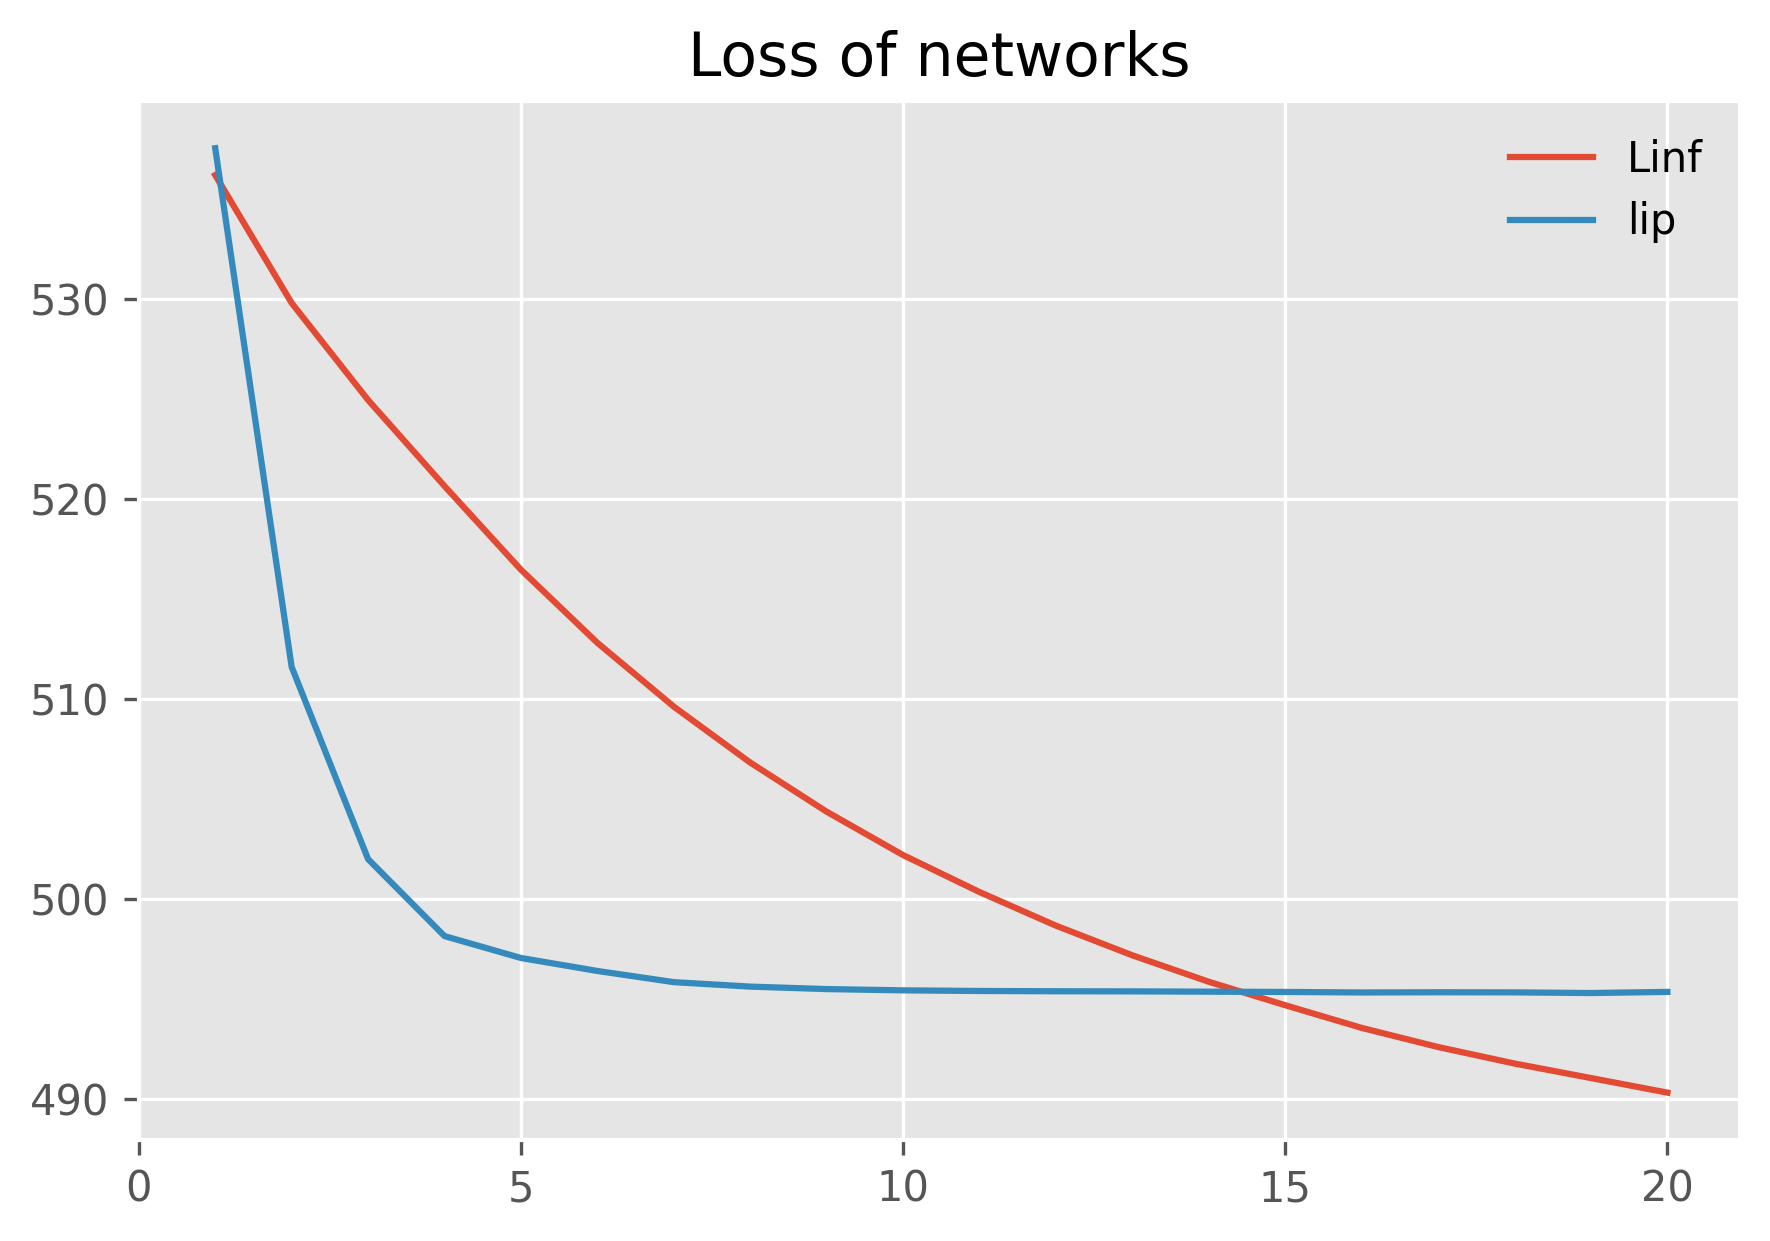

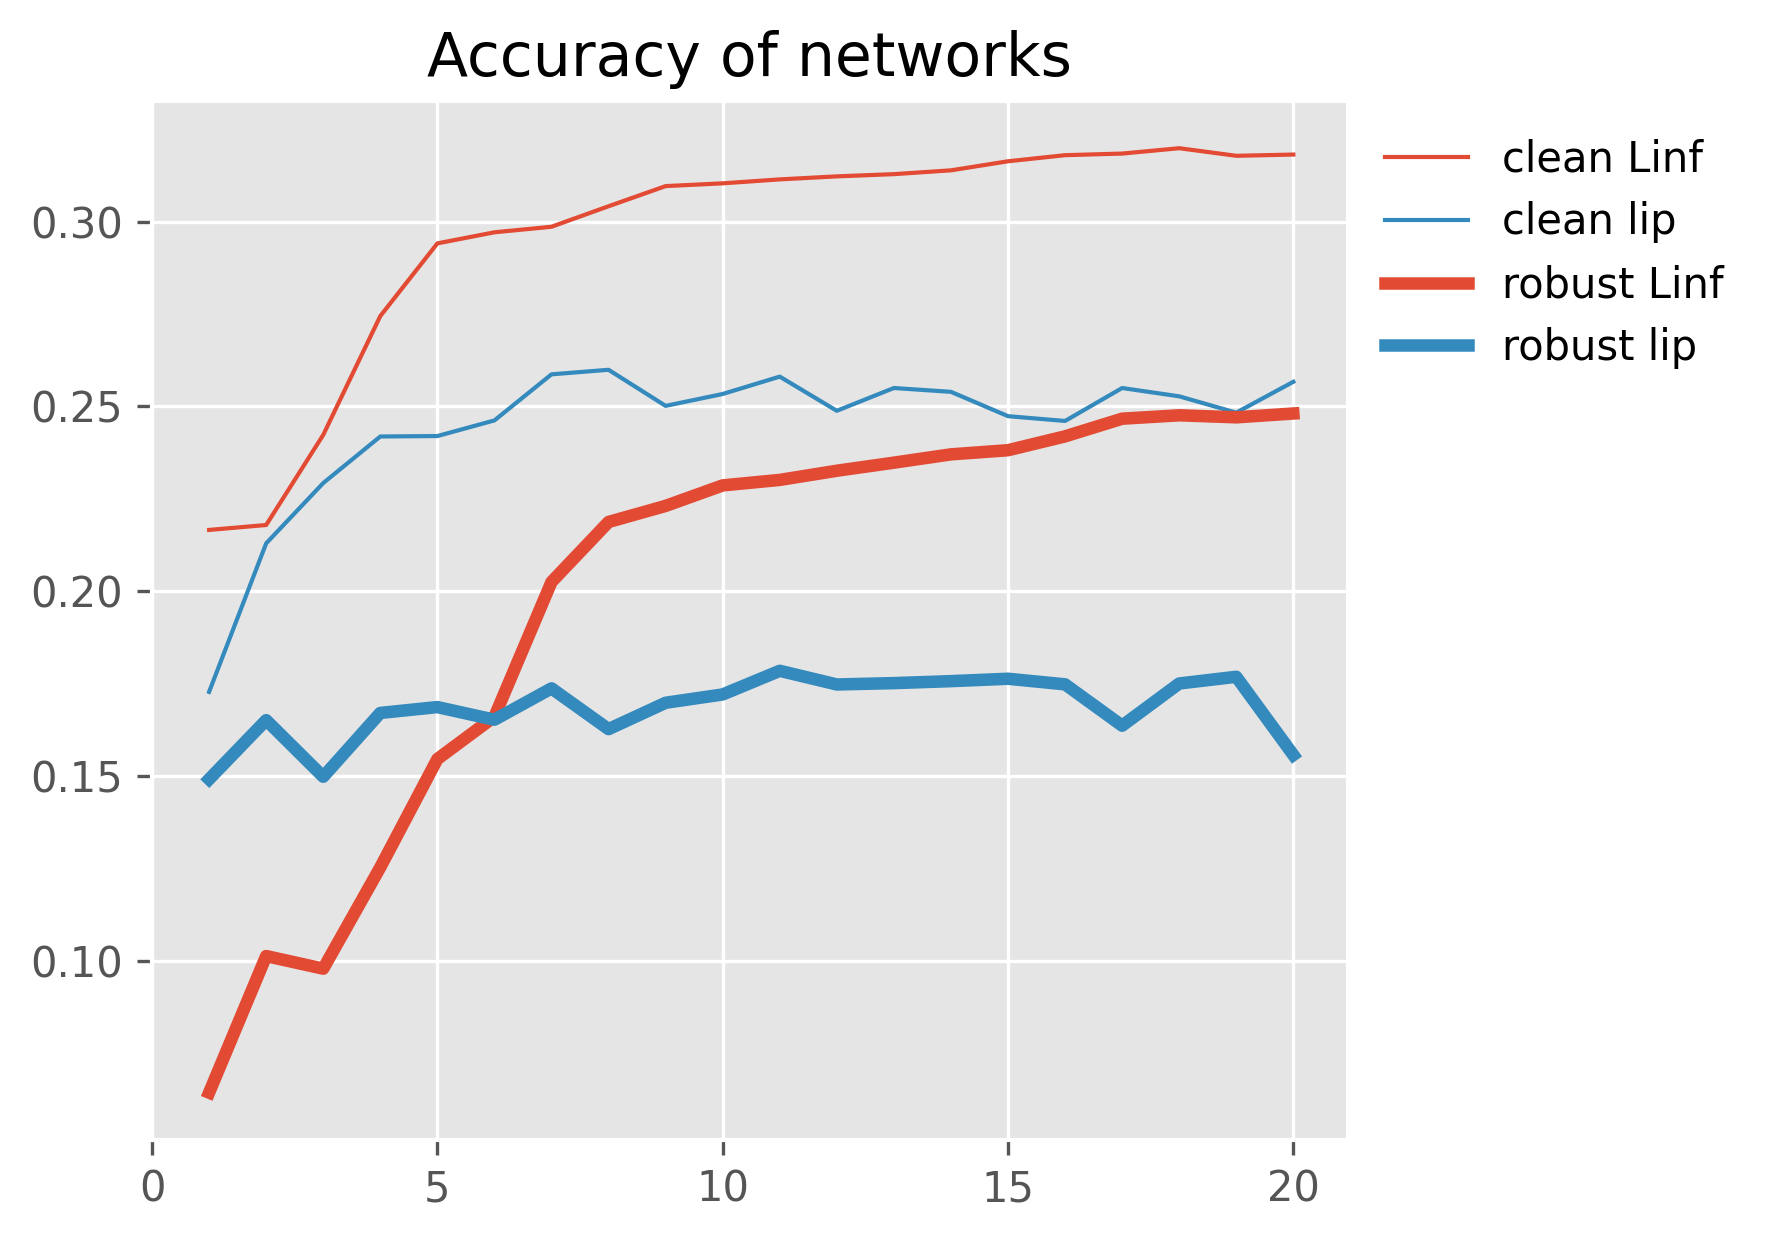

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
def plot(ax, data_dict, name, **args):
    for label, data in data_dict.items():
        ax.plot(range(1, 21), data, label=name+label, **args)
    ax.set_xticks(range(0, 21, 5))

# ----------------------------------- LOSS ----------------------------------- #
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

from output.robust import loss
plot(ax, loss, "")
ax.legend(bbox_to_anchor=(1, 1), framealpha=0)
fig.tight_layout(), ax.set_title("Loss of networks"), plt.show();

# --------------------------------- ACCURACY --------------------------------- #
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

from output.robust import accuracy, certify
plt.gca().set_prop_cycle(None)
plot(ax, accuracy, "clean ", linewidth=1)
plt.gca().set_prop_cycle(None)
plot(ax, certify, "robust ", linewidth=3)
ax.legend(bbox_to_anchor=(1, 1), framealpha=0)
fig.tight_layout(), ax.set_title("Accuracy of networks"), plt.show();
